<a href="https://colab.research.google.com/github/LavanyaPobbathi/Data-Visualization-on-Cybersecurity/blob/main/House%20Price%20Prediction%20-%20Linear%20Regression/House_Price_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

So to deal with this kind of issues Today we will be preparing a MACHINE LEARNING Based model, trained on the House Price Prediction Dataset.

The dataset contains 13 features:

1	Id	To count the records.
2	MSSubClass	 Identifies the type of dwelling involved in the sale.
3	MSZoning	Identifies the general zoning classification of the sale.
4	LotArea	 Lot size in square feet.
5	LotConfig	Configuration of the lot
6	BldgType	Type of dwelling
7	OverallCond	Rates the overall condition of the house
8	YearBuilt	Original construction year
9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).
10	Exterior1st	Exterior covering on house
11	BsmtFinSF2	Type 2 finished square feet.
12	TotalBsmtSF	Total square feet of basement area
13	SalePrice	To be predicted


# Importing Libraries and Dataset

Here we are using

1. Pandas – To load the Dataframe
2. Matplotlib – To visualize the data features i.e. barplot
3. Seaborn – To see the correlation between features using heatmap


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("HousePricePrediction.xlsx")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
df.shape

(2919, 13)

# Data Preprocessing

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them.

In [6]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))


intvar = (df.dtypes == 'int')
num_cols = list(intvar[intvar].index)
print("Integer Variables:",len(num_cols))

f1 = (df.dtypes == 'float')
f1_cols = list(f1[f1].index)
print("Float variables:", len(f1_cols))

Categorical variables: 4
Integer Variables: 6
Float variables: 3


# Exploratory Data Analysis

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables

In [17]:
plt.figure(figsize = (12,6))
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()


<Figure size 1200x600 with 0 Axes>

<Axes: >

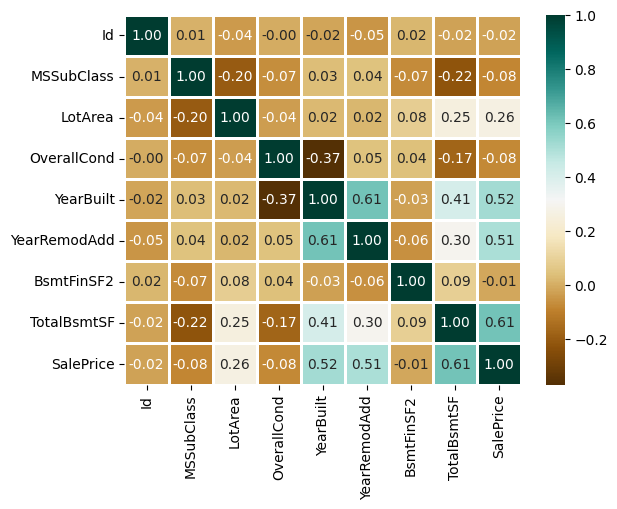

In [18]:
sns.heatmap(corr_matrix, cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)

To analyze the different categorical features. Let’s draw the barplot.

<Axes: title={'center': 'No. of Unique values of categorial features'}>

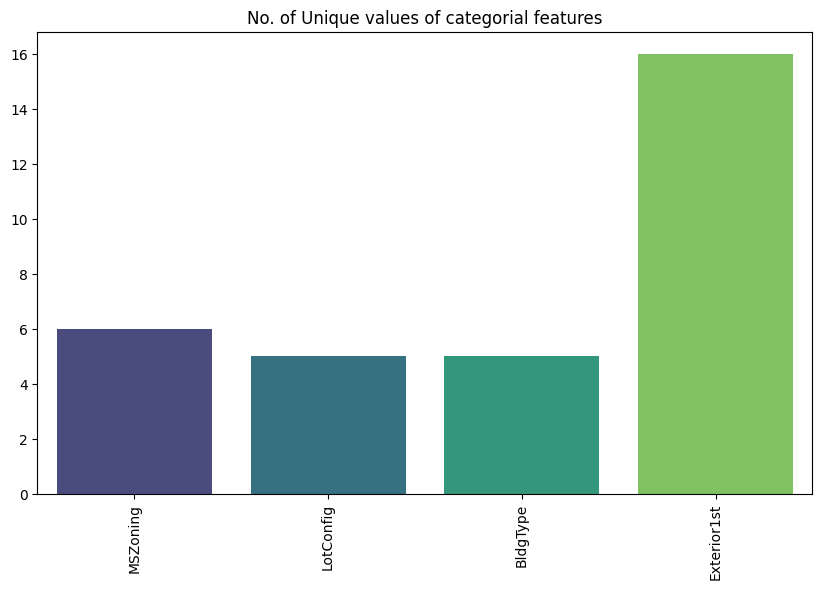

In [26]:
unique_val = []
for i in object_cols:
  unique_val.append(df[i].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. of Unique values of categorial features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y = unique_val,hue=object_cols, palette='viridis', legend=False)

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

<ipython-input-27-189b8632c199>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


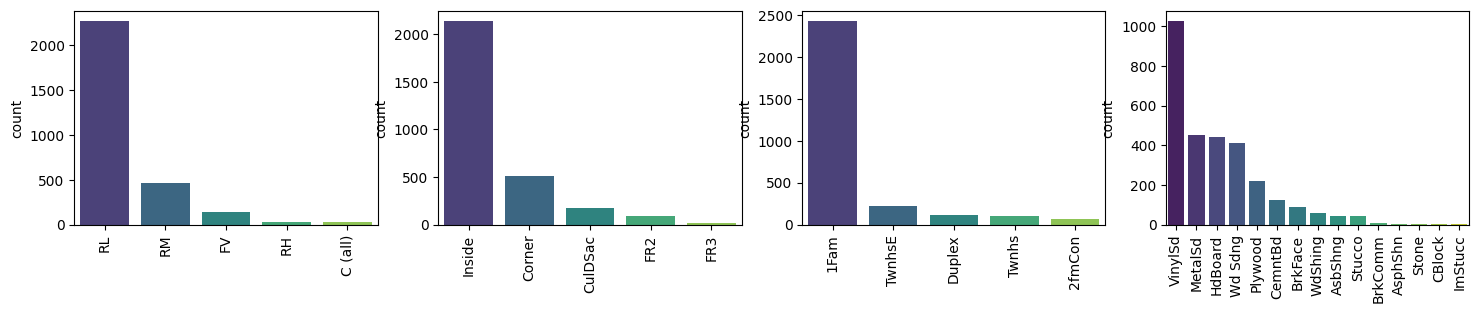

In [27]:
plt.figure(figsize=(18,36))
plt.title('categorical features: Distribution')
plt.xticks(rotation = 90)
index = 1

for i in object_cols:
  y = df[i].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y, hue=list(y.index), palette='viridis', legend=False)
  index +=1

# Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).

Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).

As Id Column will not be participating in any prediction. So we can Drop it.

In [28]:
df.drop(['Id'], axis=1, inplace=True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [29]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

Drop records with null values (as the empty records are very less).


In [32]:
n_df = df.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [33]:
n_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder – For Label categorical features

One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [34]:
from sklearn.preprocessing import OneHotEncoder

s = (n_df.dtypes == 'object')
obj_col = list(s[s].index)
print("Categorical Variables:")
print(obj_col)
print("No. of categorical features: ", len(obj_col))

Categorical Variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [37]:
ohen = OneHotEncoder(sparse_output=False)
ohcols = pd.DataFrame(ohen.fit_transform(n_df[obj_col]))
ohcols.index = n_df.index
ohcols.columns = ohen.get_feature_names_out()
df_final = n_df.drop(obj_col, axis = 1)
df_final = pd.concat([df_final, ohcols], axis=1)

#Splitting Dataset into Training and Testing

X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

x = df_final.drop(['SalePrice'], axis = 1)
y = df_final['SalePrice']

x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size = 0.2, random_state = 0)

# Linear Regression Model and Accuracy

As we have to train the model to determine the continuous values, so we will be using below regression model.

Linear Regressor

In [40]:
from sklearn.linear_model import LinearRegression

modelLr = LinearRegression()
modelLr.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = modelLr.predict(x_test)

In [46]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.18741683841599854
